<a href="https://colab.research.google.com/github/Mayank300/PROJECT-119/blob/main/PROJECT_119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/whitehatjr/datasets/master/C119/titanic.csv')

print(data.head())

   PassengerId  Pclass  Sex   Age  SibSp  Parch  Survived
0            1       3    1  34.5      1      0         0
1            2       1    0  47.0      1      0         1
2            3       3    0  62.0      0      0         1
3            4       1    0  27.0      1      0         1
4            5       3    1  22.0      0      0         0


In [ ]:
column_title = ['passengerID', 'p_class', 'gender', 'age', 'sibSP', 'parch', 'survived']

data = pd.read_csv('https://raw.githubusercontent.com/whitehatjr/datasets/master/C119/titanic.csv', names = column_title).iloc[1:]

print(data.head())

  passengerID p_class gender   age sibSP parch survived
1           1       3      1  34.5     1     0        0
2           2       1      0    47     1     0        1
3           3       3      0    62     0     0        1
4           4       1      0    27     1     0        1
5           5       3      1    22     0     0        0


In [ ]:
features = ['passengerID', 'gender', 'age', 'survived']

X = data[features]
y = data.survived

print(X)


    passengerID gender   age survived
1             1      1  34.5        0
2             2      0    47        1
3             3      0    62        1
4             4      0    27        1
5             5      1    22        0
..          ...    ...   ...      ...
887         887      1    34        0
888         888      0     5        1
889         889      0    52        0
890         890      1    36        1
891         891      1     4        0

[891 rows x 4 columns]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=0)

classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,Y_train)
Y_prediction = classifier.predict(X_test)

print('accuracy',metrics.accuracy_score(Y_test, Y_prediction))

accuracy 1.0


In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(dot_data.getvalue())


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<survived &le; 0.5<br/>gini = 0.475<br/>samples = 623<br/>value = [381, 242]<br/>class = 0>, fillcolor="#f6d1b7"] ;
1 [label=<gini = 0.0<br/>samples = 381<br/>value = [381, 0]<br/>class = 0>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.0<br/>samples = 242<br/>value = [0, 242]<br/>class = 1>, fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


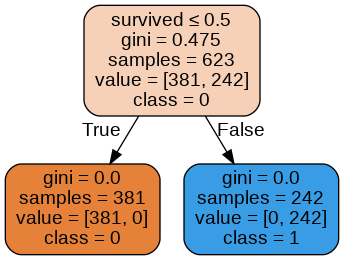

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('die.png')

Image(graph.create_png())

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train,Y_train) 
Y_prediction = classifier.predict(X_test)

print('accuracy', metrics.accuracy_score(Y_test,Y_prediction))


accuracy 1.0


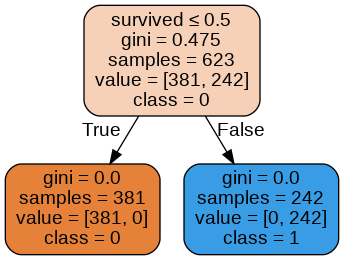

In [ ]:
dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('die.png')

Image(graph.create_png())
